# 201901575 연수연
## 중간고사 대체과제

## 대체과제 1번. csv 파일 읽기 & 그래프 그리기

[8, 57, 21, 2, 5, 0, 14]


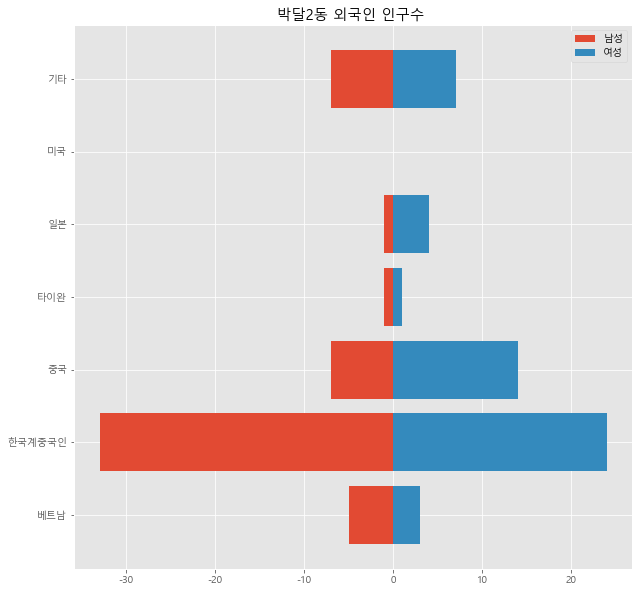

In [130]:
import csv
import matplotlib.pyplot as plt
f=open('anyang_foreigner.csv','r')
data = csv.reader(f)

bakdal_man_minus=[]
bakdal_man=[]
bakdal_woman=[]

nation=['베트남','한국계중국인','중국','타이완','일본','미국','기타']

for row in data:
    if row[3:10]!='':
        if '박달2동' in row[0]:
            if '남' in row[1]:
                for i in range(3,10):
                    bakdal_man_minus.append(-int(row[i]))
                    bakdal_man.append(int(row[i]))
            else:
                for i in range(3,10):
                    bakdal_woman.append(int(row[i]))
bakdal_total=[bakdal_man[i]+bakdal_woman[i] for i in range(len(bakdal_man))]
f.close()

plt.rc('font',family='Malgun Gothic')
plt.title('박달2동 외국인 나라별 남녀별 인구수 ')
plt.rcParams['axes.unicode_minus']=False
plt.barh(nation, bakdal_man_minus, label='남성')
plt.barh(nation, bakdal_woman, label='여성')

plt.legend(loc=1)
plt.show()

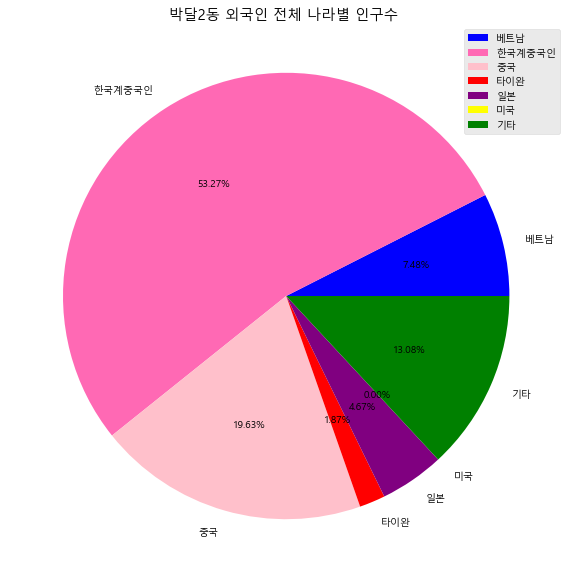

In [139]:
plt.rc('font',family='Malgun Gothic')
plt.title('박달2동 외국인 전체 나라별 인구수 ')
plt.axis('equal')
label = []
color=['blue','hotpink','pink','red','purple','yellow','green']
plt.pie(bakdal_total,labels=nation,autopct='%.2f%%',colors=color)
plt.legend(loc=1)
plt.show()

### 1. 데이터 설명
- 경기도 안양시의 외국인 정보가 들어있는 데이터를 선택했다.
- url : https://www.data.go.kr/data/3079514/fileData.do
- 원래 csv 파일의 이름은 '경기도 안양시_외국인 정보_20200831.csv' 지만 편리를 위해 'anyang_foreigner.csv' 로 변경해 사용했다.

### 2. 데이터 선택 이유
- 나는 안양시 박달2동 집에 오래 살았다. 우리 아파트 나와 같은 라인에 최근 어떤 외국인 여성분이 이사온 것을 보았다. 그래서 박달 2동에는 어느나라 사람들이 많은 지 궁금했고, 그에 따른 남녀 성비도 궁금해서 박달 2동 외국인 남녀의 나라별 그래프로 나타내 비교해보았다.

### 3. 데이터 전처리 내용
- 먼저 박달2동의 남자와 여자의 수를 담을 리스트를 만들었다. 남자는 항아리 모양 그래프를 위해 음수를 저장할 리스트를 따로 만든다.
- 각각 리스트에 베트남부터 기타 나라까지의 사람 수를 넣기 위해 먼저 베트남~기타 까지 빈 곳이 있는 지 확인하고, row[0]으로 박달2동인 것을 찾는다.
- 그다음 row[1]이 남자면 남자 리스트(음수)에 베트남부터 기타나라까지의 수를 음수로 넣었다. 그리고 나중에 전체 수를 더할 것을 고려하여 남자 리스트(양수)에도 수를 넣는다. 그 다음 여자 리스트에 나라별 수를 넣었다.
- bakdal_total 리스트에 남녀 합한 나라별 전체 인구수를 넣는다.
- 또한, 그래프를 그릴 때 쓰기 위해 nation 리스트를 만들어 각각 나라 이름들을 넣는다. 

### 4. 그래프 결과 해석
- 첫번째 항아리 모양 그래프를 보면 한국계 중국인 남성이 가장 많으며, 한국계 중국인 여성은 그보다는 적지만 다음으로 많다. 그 다음으로는 중국인 중에서는 여성이 많은 것을 한눈에 알 수 있다. 남성과 여성에서의 결과를 쉽게 보기위해선 항아리 그래프를 통해 나타내는 것이 적합하다고 생각해 항아리 그래프를 통해 나타냈다.
- 두번째는 파이 차트로 남녀를 합한 전체 인구수를 나라별로 보기쉽게 그래프로 나타냈다. 경기도 안양시 박달 2동에 한국계 중국인이 가장 많으며, 그다음으로는 중국인, 기타순으로 진행되며 미국인은 없는 것으로 나타났다.


## 대체과제 2번. html 안의 테이블 데이터 읽기 & 그래프 그리기

<AxesSubplot:xlabel='영상 이름'>

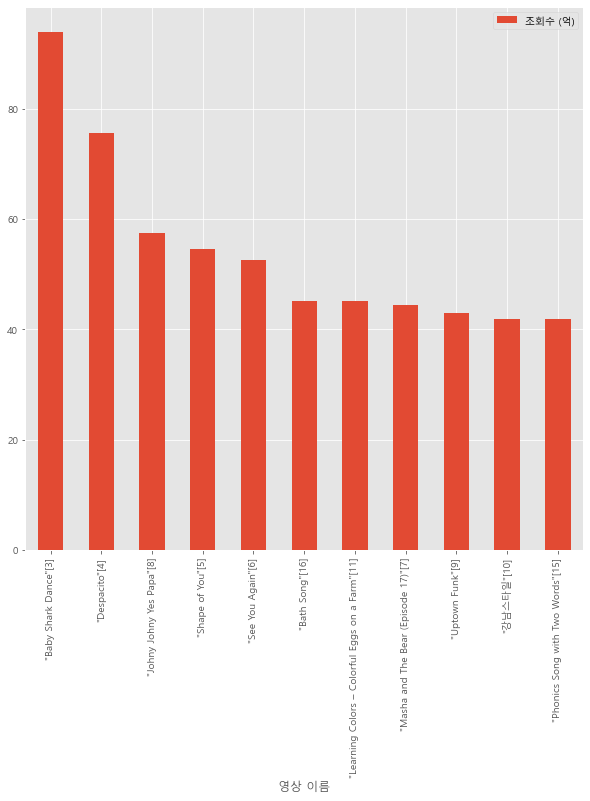

In [145]:
import pandas as pd
url = "https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%8A%9C%EB%B8%8C_%EC%B5%9C%EB%8B%A4_%EC%A1%B0%ED%9A%8C%EC%88%98_%EC%98%81%EC%83%81_%EB%AA%A9%EB%A1%9D"
df = pd.read_html(url, header=0,index_col=1) #영상 이름을 행 이름으로 지정
a = df[0]
a = a.drop(index='2020년 11월 2일') # 테이블 마지막이 순위를 나타낸 것 아니기 때문에 삭제
a = a.iloc[:,2:4:2]
a = a.astype(float)
a = a.sort_values(by='조회수 (억)',ascending=False)

import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")
a[0:11].plot(kind='bar')



### 1. 데이터 설명
- 위키피디아에서 유튜브 최다 조회수 영상 목록에 대한 데이터를 선택했다.
- url: https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%8A%9C%EB%B8%8C_%EC%B5%9C%EB%8B%A4_%EC%A1%B0%ED%9A%8C%EC%88%98_%EC%98%81%EC%83%81_%EB%AA%A9%EB%A1%9D

### 2. 데이터 선택 이유
- 평소에 유튜브를 자주보는데 최근 유튜브 알고리즘을 통해 우리나라 k-pop 걸그룹 뮤비 조회수 Top10에 관한 영상을 봤다. 그래서 전체 유튜브에서 현재 조회수가 가장 많은 Top10 영상이 무엇인지 궁금해져서 이와 관련된 유튜브 최다 조회수 영상에 대해 알아보기로 했다.

### 3. 데이터 전처리 내용
- 먼저 테이블을 받아왔는데, 마지막에 순위와 관련없는 행이 있어서 drop으로 제거했다.
- 그리고 iloc을 통해 영상 이름과 조회수만 남도록 했다. 순위라는 것이 있었지만 위키피디아에서 순위가 달라지면서 업데이트를 하면서 순위가 제대로 편성되지 않아 이것을 포함하지 않았다.
- 마찬가지로 업데이트를 하며 조회수 순서에도 바뀐 부분이 있어 직접 내림차순으로 정렬했다.
- 그리고 조회수가 93.8 이런 식으로 되어있기 때문에 float형으로 바꾸었다.


### 4. 그래프 결과 해석
- 조회수 순으로 내림차순 정렬을 했기 때문에 막대그래프가 가독성이 좋을 것이고, 각 순위별로의 큰 차이가 나는지 쉽게 볼 수 있을 것 같다고 생각해 이용했다. 유튜브에서 최다 조회수를 기록한 영상은 핑크퐁의 Baby Shark Dance였다. 그리고 뒤로 팝송들이 뒤를 잇고, 강남스타일도 순위 안에 들게 되었다. 또한 1위인 Baby Shark Dance와 2위는 조회수 차이가 꽤 난다. 그리고 3~5위는 차이가 많이 없으며 5-6사이 차이가 조금 생기며 그뒤로는 차이가 많이 없는 것을 알 수 있다.